In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import get_data_obj
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
oj = get_data_obj.get_data()

In [3]:
def scale_data(df):
    y = df['target']
    x = df.drop(['target'], axis = 1)
    scaler = MinMaxScaler()
    data = scaler.fit_transform(x)
    scale_data = pd.DataFrame(data)
    return scale_data, y

In [4]:
def get_train_test_pca(scale_data, y):
    pca = PCA(n_components= 280)
    pca.fit(scale_data)
    scale_transform = pca.transform(scale_data)
    x = pd.DataFrame(scale_transform)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2020, stratify=y)
    return x_train, x_test, y_train, y_test

In [5]:
def random_for(x_train, x_test, y_train, y_test):
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred_train = rf.predict(x_train)
    pred_test = rf.predict(x_test)
    training_acc = metrics.accuracy_score(y_train, pred_train)
    testing_acc = metrics.accuracy_score(y_test, pred_test)
    return training_acc, testing_acc

## Roberts Training and Testing Accuracy

In [12]:
df = oj.roberts()
scale_data, y = scale_data(df)
x_train, x_test, y_train, y_test = get_train_test_pca(scale_data, y)
training_acc, testing_acc = random_for(x_train, x_test, y_train, y_test)
print('Training accuracy for Roberts: {}'.format(training_acc))
print('Testing accuracy for Roberts: {}'.format(testing_acc))

Training accuracy for Roberts: 1.0
Testing accuracy for Roberts: 0.9428794992175273


## Sobel Training and Testing Accuracy

In [6]:
df = oj.sobel()
scale_data, y = scale_data(df)
x_train, x_test, y_train, y_test = get_train_test_pca(scale_data, y)
training_acc, testing_acc = random_for(x_train, x_test, y_train, y_test)
print('Training accuracy for Sobel: {}'.format(training_acc))
print('Testing accuracy for Sobel: {}'.format(testing_acc))

Training accuracy for Roberts: 1.0
Testing accuracy for Roberts: 0.9585289514866979


## Prewitt Training and Testing Accuracy

In [6]:
df = oj.prewitt()
scale_data, y = scale_data(df)
x_train, x_test, y_train, y_test = get_train_test_pca(scale_data, y)
training_acc, testing_acc = random_for(x_train, x_test, y_train, y_test)
print('Training accuracy for Prewitt: {}'.format(training_acc))
print('Testing accuracy for Prewitt: {}'.format(testing_acc))

Training accuracy for Roberts: 1.0
Testing accuracy for Roberts: 0.960093896713615


## Canny Training and Testing Accuracy

In [6]:
df = oj.canny()
scale_data, y = scale_data(df)
x_train, x_test, y_train, y_test = get_train_test_pca(scale_data, y)
training_acc, testing_acc = random_for(x_train, x_test, y_train, y_test)
print('Training accuracy for Canny: {}'.format(training_acc))
print('Testing accuracy for Canny: {}'.format(testing_acc))

Training accuracy for Roberts: 1.0
Testing accuracy for Roberts: 0.9131455399061033


## Manual Hyperparameter tuning for Min Samples Split

In [6]:
df = oj.constant()
scale_data, y = scale_data(df)
x_train, x_test, y_train, y_test = get_train_test_pca(scale_data, y)

In [12]:
splits = [2, 5, 10, 15, 20, 25, 20, 35, 40]
#train = []
test_con = []
for i in splits:
    rf = RandomForestClassifier(min_samples_split= i)
    rf.fit(x_train, y_train)
    pred_train = rf.predict(x_train)
    pred_test = rf.predict(x_test)
    training_acc = metrics.accuracy_score(y_train, pred_train)
    testing_acc = metrics.accuracy_score(y_test, pred_test)
    #train.append(training_acc)
    test_con.append(testing_acc)

In [15]:
test_con

[0.971830985915493,
 0.97339593114241,
 0.97339593114241,
 0.9663536776212832,
 0.9616588419405321,
 0.9593114241001565,
 0.956964006259781,
 0.960093896713615,
 0.9428794992175273]

In [6]:
df = oj.prewitt()
scale_data, y = scale_data(df)
x_train, x_test, y_train, y_test = get_train_test_pca(scale_data, y)

In [7]:
splits = [2, 5, 10, 15, 20, 25, 20, 35, 40]
#train = []
test_prew = []
for i in splits:
    rf = RandomForestClassifier(min_samples_split= i)
    rf.fit(x_train, y_train)
    pred_train = rf.predict(x_train)
    pred_test = rf.predict(x_test)
    training_acc = metrics.accuracy_score(y_train, pred_train)
    testing_acc = metrics.accuracy_score(y_test, pred_test)
    #train.append(training_acc)
    test_prew.append(testing_acc)

In [8]:
test_prew

[0.9553990610328639,
 0.9694835680751174,
 0.960093896713615,
 0.9514866979655712,
 0.9444444444444444,
 0.9366197183098591,
 0.9405320813771518,
 0.9413145539906104,
 0.9194053208137715]

In [11]:
test_con = [0.971830985915493,
 0.97339593114241,
 0.97339593114241,
 0.9663536776212832,
 0.9616588419405321,
 0.9593114241001565,
 0.956964006259781,
 0.960093896713615,
 0.9428794992175273]

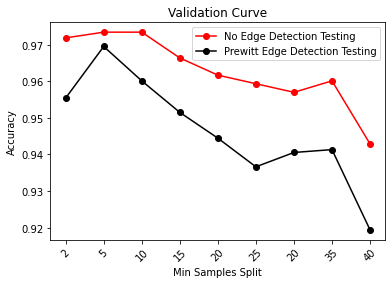

In [12]:
plt.plot(test_con, marker='o', color = 'red', label = 'No Edge Detection Testing')
plt.plot(test_prew, marker = 'o', color = 'black', label = 'Prewitt Edge Detection Testing')
plt.title('Validation Curve')
plt.xticks(ticks=np.arange(len(splits)), labels= splits, rotation=45)
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Manual Hyperparameter tuning for Number of Estimators

In [6]:
df = oj.constant()
scale_data, y = scale_data(df)
x_train, x_test, y_train, y_test = get_train_test_pca(scale_data, y)

In [8]:
estimators = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
#train = []
test_con = []
for i in estimators:
    rf = RandomForestClassifier(n_estimators = i)
    rf.fit(x_train, y_train)
    pred_train = rf.predict(x_train)
    pred_test = rf.predict(x_test)
    training_acc = metrics.accuracy_score(y_train, pred_train)
    testing_acc = metrics.accuracy_score(y_test, pred_test)
    #train.append(training_acc)
    test_con.append(testing_acc)

In [9]:
test_con

[0.92018779342723,
 0.9499217527386542,
 0.9624413145539906,
 0.9671361502347418,
 0.97339593114241,
 0.9710485133020345,
 0.974960876369327,
 0.974960876369327,
 0.97339593114241,
 0.9804381846635368]

In [6]:
df = oj.prewitt()
scale_data, y = scale_data(df)
x_train, x_test, y_train, y_test = get_train_test_pca(scale_data, y)

In [7]:
estimators = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
#train = []
test_prew = []
for i in estimators:
    rf = RandomForestClassifier(n_estimators= i)
    rf.fit(x_train, y_train)
    pred_train = rf.predict(x_train)
    pred_test = rf.predict(x_test)
    training_acc = metrics.accuracy_score(y_train, pred_train)
    testing_acc = metrics.accuracy_score(y_test, pred_test)
    #train.append(training_acc)
    test_prew.append(testing_acc)

In [8]:
test_con = [0.92018779342723,
 0.9499217527386542,
 0.9624413145539906,
 0.9671361502347418,
 0.97339593114241,
 0.9710485133020345,
 0.974960876369327,
 0.974960876369327,
 0.97339593114241,
 0.9804381846635368]

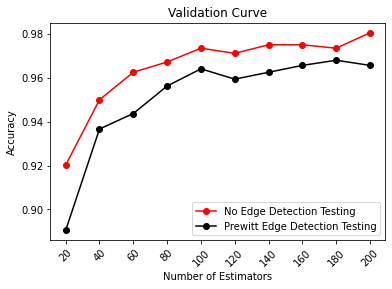

In [9]:
plt.plot(test_con, marker='o', color = 'red', label = 'No Edge Detection Testing')
plt.plot(test_prew, marker = 'o', color = 'black', label = 'Prewitt Edge Detection Testing')
plt.title('Validation Curve')
plt.xticks(ticks=np.arange(len(estimators)), labels= estimators, rotation=45)
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Final Model

In [6]:
df = oj.constant()
scale_data, y = scale_data(df)
x_train, x_test, y_train, y_test = get_train_test_pca(scale_data, y)

In [7]:
rf = RandomForestClassifier(n_estimators= 100, min_samples_split= 5)
rf.fit(x_train, y_train)
pred_train = rf.predict(x_train)
pred_test = rf.predict(x_test)
print(metrics.confusion_matrix(y_test, pred_test))

[[620  20]
 [ 18 620]]


In [8]:
print('Training Accuracy', metrics.accuracy_score(y_train, pred_train))
print('Testing Accuracy', metrics.accuracy_score(y_test, pred_test))
print('Recall', metrics.recall_score(y_test, pred_test))
print('Specificity', (620/640))
print('Percision', metrics.precision_score(y_test, pred_test))
print('F1 Score', metrics.f1_score(y_test, pred_test))

Training Accuracy 1.0
Testing Accuracy 0.9702660406885759
Recall 0.9717868338557993
Specificity 0.96875
Percision 0.96875
F1 Score 0.9702660406885759
